In [7]:
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation as SAX
from tqdm.auto import tqdm, trange

import utils

In [8]:
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')

## Sequential pattern mining

Convert the time series into a discrete format (e.g., by using SAX) and extract the most frequent sequential patterns (of at least length 3/4) using different values of support, then discuss the most interesting sequences.

In [93]:
from load_data import load_data
X_train, y_train, X_test, y_test = load_data(log_transform=True)

  0%|          | 0/106574 [00:00<?, ?it/s]

['e' 'e' 'f' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'f' 'f' 'f' 'f' 'f' 'h' 'h'
 'g' 'g' 'g' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h'
 'h' 'h' 'h' 'g' 'h' 'h' 'g' 'h' 'h' 'e' 'h' 'h' 'h' 'f']


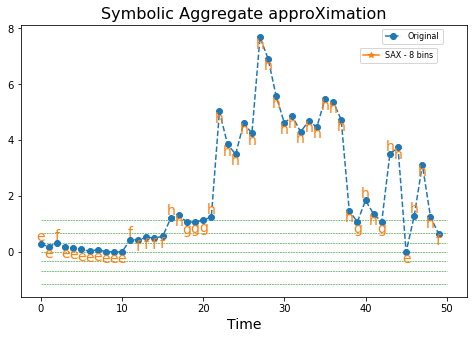

In [94]:
X = X_train

# SAX transformation
n_bins = 8
sax = SAX(n_bins=n_bins, strategy='normal')
X_sax = sax.fit_transform(X)

print(X_sax[0])

n_samples, n_timestamps = X.shape

# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])

# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

plt.figure(figsize=(8, 5))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label=f'SAX - {n_bins} bins')
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()

In [95]:
sub_len = 5
subsequences = {}

for x in tqdm(X_sax):
    x = "".join([el for ei, el in enumerate(x) if ei<len(x)-1 and x[ei+1]!= el])
    for si in range(len(x)-sub_len):
        subs = x[si:si+sub_len]
        if subs not in subsequences:
            subsequences[subs] = 0
        subsequences[subs] += 1
        
subsequences = sorted([(k, v) for k, v in subsequences.items()], key = lambda el: -el[1])

subsequences[:10]

  0%|          | 0/1308 [00:00<?, ?it/s]

[('fefef', 824),
 ('efefg', 628),
 ('fefgh', 604),
 ('hghgh', 518),
 ('ghghe', 514),
 ('fghgh', 392),
 ('ghghg', 290),
 ('efghf', 290),
 ('efghg', 259),
 ('efefh', 256)]

## Advanced Clustering
On a dataset already prepared for one of the previous tasks in Module 1 or Module 2, run at least one clustering algorithm presented in the advanced clustering lectures (e.g. X-Means, Bisecting K-Means, OPTICS). Discuss the results that you find analyzing the clusters and reporting external validation measures (e.g SSE, silhouette).

In [30]:
from load_data import load_data
X_train, y_train, X_test, y_test = load_data(log_transform=False)

  0%|          | 0/106574 [00:00<?, ?it/s]

In [31]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA

In [32]:
from sklearn.cluster import OPTICS
X = np.array([[1, 2], [2, 5], [3, 6],
              [8, 7], [8, 8], [7, 3]])
clustering = OPTICS(min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, 1, 1, 1])

In [96]:
for ms in range(1, 20):
    print(ms, end='&')
print()
for ms in range(1, 20):
    clu = OPTICS(min_samples=ms)
    pred = clu.fit(X_test).labels_
    print(len(set(pred)), end='&')

1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19&1&29&5&3&2&2&2&2&2&1&2&1&1&2&1&1&1&1&1&

No handles with labels found to put in legend.


6 9


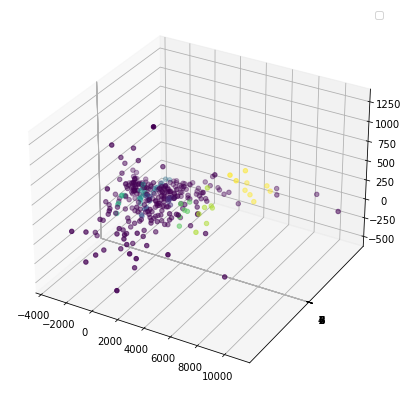

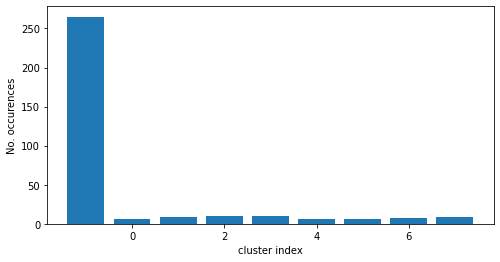

In [90]:
ms=6
clu = OPTICS(min_samples=ms)
pred = clu.fit(X_test).labels_
print(ms, len(set(pred)))

pca = PCA(n_components=3)
pca.fit(X_train)
tr = pca.transform(X_test)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(tr[:, 0], -tr[:, 1], tr[:, 2], c = pred)


plt.yticks(list(range(n_clusters)))
plt.legend()
plt.show()



labels = list(sorted(list(set(pred))))
plt.bar(labels, [len([1 for el in pred if el==l]) for l in labels])
plt.xlabel('cluster index')
plt.ylabel('No. occurences')
plt.show()

## Transactional Clustering
By using categorical features, or by turning a dataset with continuous variables into a dataset with categorical variables (e.g. by using binning), run at least one clustering algorithm presented in the transactional clustering lectures (e.g. K-Modes, ROCK). Discuss the results that you find analyzing the clusters and reporting external validation measures (e.g SSE, silhouette).

No handles with labels found to put in legend.


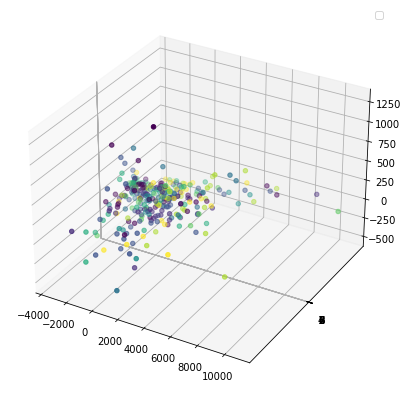

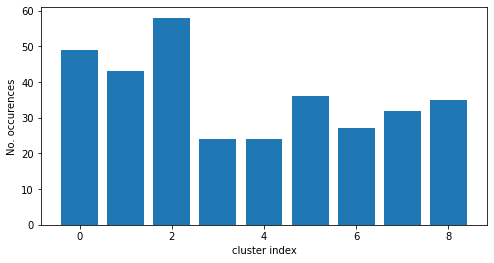

In [91]:
from kmodes.kmodes import KModes

n_clusters = 9

n_bins = 8
sax = SAX(n_bins=n_bins, strategy='normal')
X_sax_train = sax.fit_transform(X_train)
X_sax_test = sax.transform(X_test)

km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=0)

pred = km.fit_predict(X_sax_test)

pca = PCA(n_components=3)
pca.fit(X_train)
tr = pca.transform(X_test)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(tr[:, 0], -tr[:, 1], tr[:, 2], c = pred)


plt.yticks(list(range(n_clusters)))
plt.legend()
plt.show()

labels = list(sorted(list(set(pred))))
plt.bar(labels, [len([1 for el in pred if el==l]) for l in labels])
plt.xlabel('cluster index')
plt.ylabel('No. occurences')
plt.show()